In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import popoff
from Session import SessionLite, build_flu_array_single
from mpl_toolkits.mplot3d import Axes3D
from linear_model import PoolAcrossSessions, LinearModel, pca_session, LabelEncoder, largest_PC_trace, largest_PC_loading, do_pca
import loadpaths
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys, os, pickle, copy
from sklearn.decomposition import PCA
import warnings
import pandas as pd
import math, cmath
from tqdm import tqdm
import pop_off_functions as pof
import pop_off_plotting as pop
from IPython.core.debugger import Pdb
ipdb = Pdb()

# sys.path.append(os.path.expanduser('~/Documents/code/PtitPrince/pititprince'))
import ptitprince as pt


user_paths_dict = loadpaths.loadpaths()

path_to_vape = user_paths_dict['vape_path']

sys.path.append(str(path_to_vape))
sys.path.append(str(os.path.join(path_to_vape, 'jupyter')))
sys.path.append(str(os.path.join(path_to_vape, 'utils')))

user_paths = loadpaths.loadpaths()
sys.path.append(user_paths['base_path'])
figure_path = '/home/tplas/repos/optistim_results/'
# from pySpatialNeuronNet import factor_analysis


COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

warnings.warn('Targets in data, fix self.ever_targetted')
remove_targets = False
pas = PoolAcrossSessions(save_PCA=False, subsample_sessions=False,
                         remove_targets=remove_targets, remove_toosoon = True)
lm = pas.linear_models[0]
print(pas.sessions)

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
short post time
short post time
short post time
short post time
short post time
short post time
short post time
ALERT SESSIONS NOT SUBSAMPLED
short post time
short post time
short post time
short post time
short post time
short post time
short post time
{3: instance Mouse J064, run 10 of Session class, 4: instance Mouse J064, run 11 of Session class, 5: instance Mouse J064, run 14 of Session class, 6: instance Mouse RL070, run 28 of Session class, 7: instance Mouse RL070, run 29 of Session class, 2: instance Mouse J063, run 9 of Session class, 1: instance Mouse J065, run 11 of Session class}


In [4]:
try:  # ensure sessions doesn't exist yet 
    sessions
    assert type(sessions) is dict
except NameError:
    pass

sessions = {}
int_keys_pas_sessions = pas.sessions.keys()
print(int_keys_pas_sessions)
assert 0 not in int_keys_pas_sessions # no zero for some reason. change this
for kk in np.sort(np.array(list(int_keys_pas_sessions))):
    sessions[int(kk - 1)] = pas.sessions[kk]
print(sessions)


for kk, ss in sessions.items():
    ss.signature = f'{ss.mouse}_R{ss.run_number}'
    
print('------------------------------------')
print(f'{len(sessions)} sessions are loaded')
tp_dict = create_tp_dict(sessions=sessions)

dict_keys([3, 4, 5, 6, 7, 2, 1])


{0: instance Mouse J065, run 11 of Session class,
 1: instance Mouse J063, run 9 of Session class,
 2: instance Mouse J064, run 10 of Session class,
 3: instance Mouse J064, run 11 of Session class,
 4: instance Mouse J064, run 14 of Session class,
 5: instance Mouse RL070, run 28 of Session class,
 6: instance Mouse RL070, run 29 of Session class}

# Intro


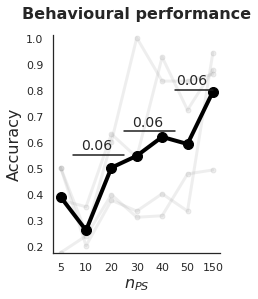

In [49]:
_ = pop.plot_behaviour_accuracy_all_mice(sessions=sessions)

In [20]:
## Shuffle data:
bool_shuffle_trials = False
bool_shuffle_s1s2 = False

for ii in range(len(sessions)):
    if bool_shuffle_trials:
        sessions[ii].shuffle_trial_labels()
    if bool_shuffle_s1s2:
        sessions[ii].shuffle_s1s2_labels()

Mouse J065, run 11


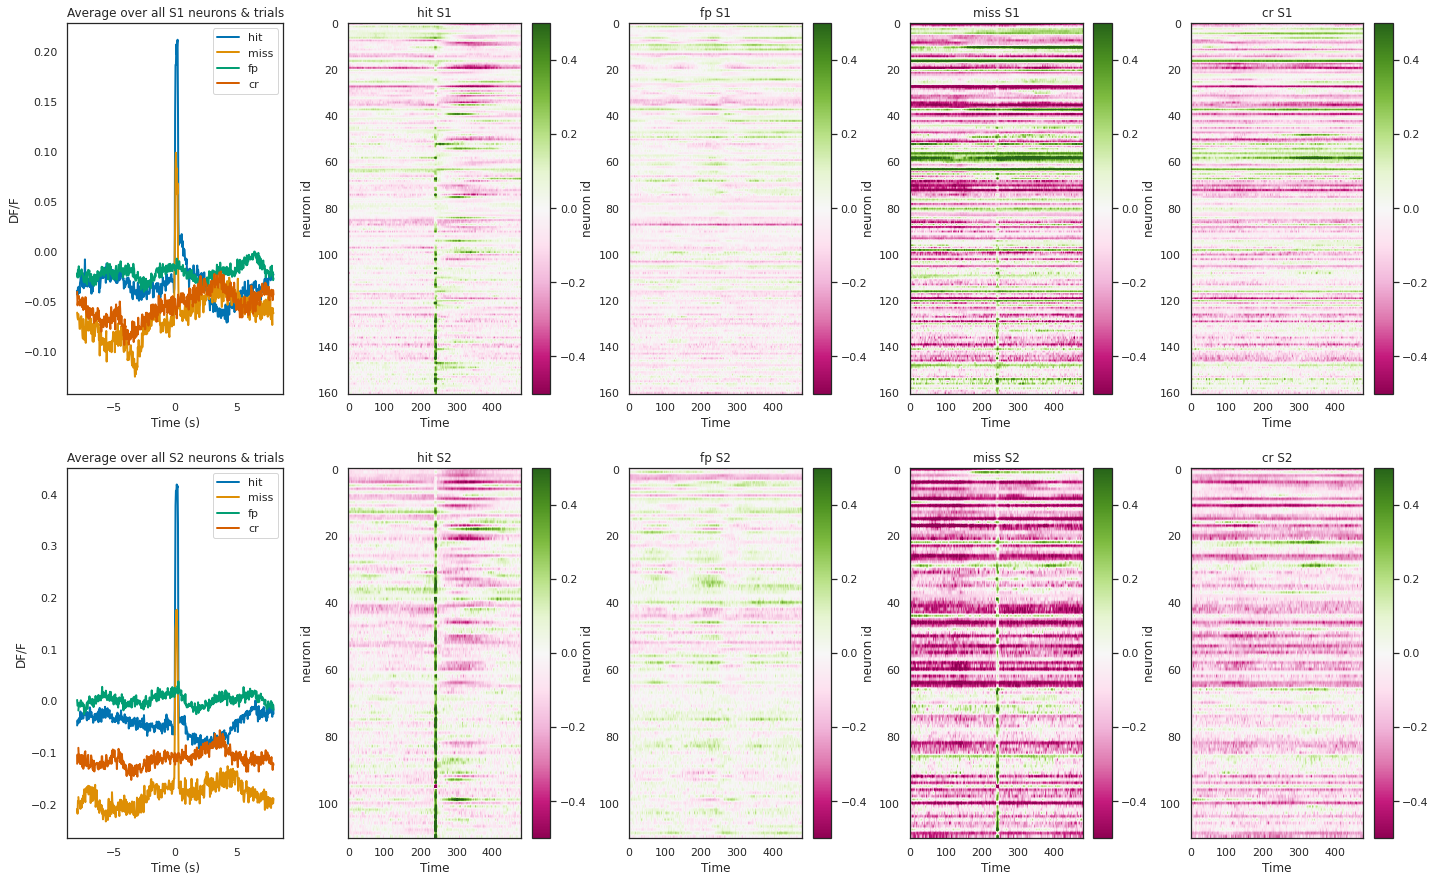

In [64]:
_ = pop.plot_raster_plots_trial_types_one_session(sessions[0])

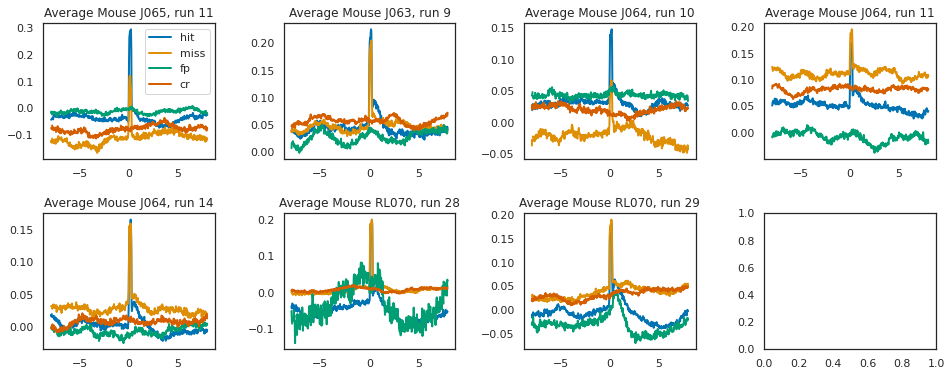

In [70]:
pop.plot_mean_traces_per_session(sessions=sessions)

In [71]:
df_differences = pof.create_df_differences(sessions=sessions)

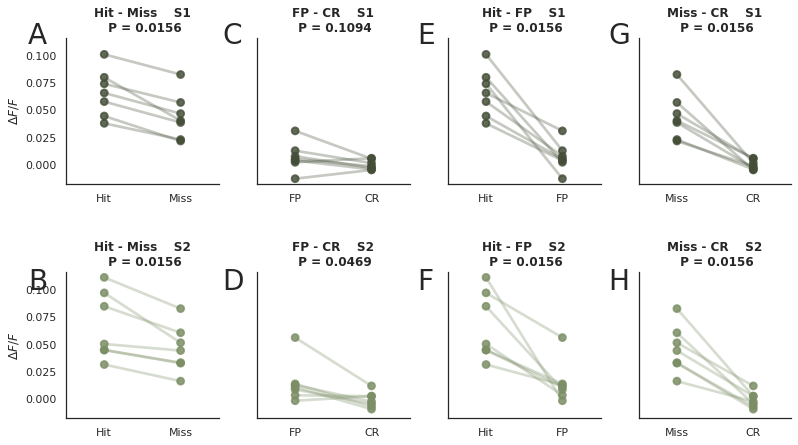

In [74]:
pop.plot_trial_type_mean_differences_pointplots(sessions=sessions, df_differences=df_differences)

In [83]:
df_dyn_differences = pof.create_df_dyn_differences(sessions=sessions, tp_dict=tp_dict)

100%|██████████| 7/7 [18:50<00:00, 161.53s/it]


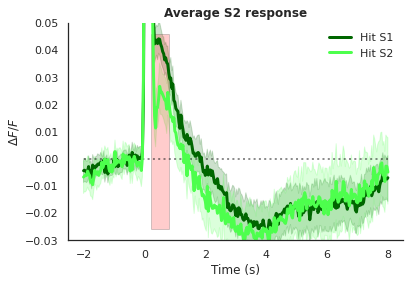

In [90]:
pop.plot_mean_trace_across_sessions(df_dyn_differences=df_dyn_differences)

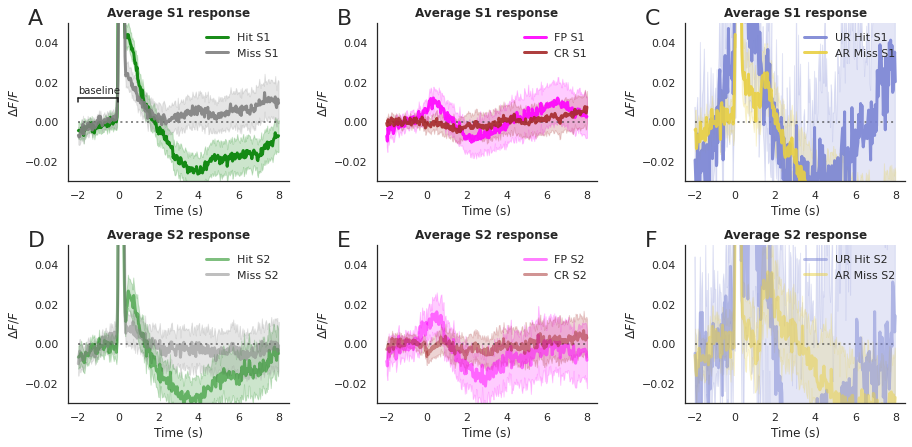

In [101]:
pop.plot_mean_trace_overview_across_sessions(df_dyn_differences=df_dyn_differences)

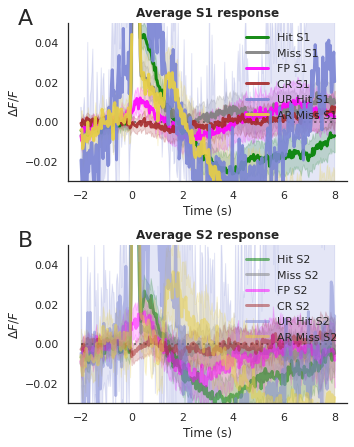

In [103]:
pop.plot_mean_trace_overview_across_sessions(df_dyn_differences=df_dyn_differences,
                                             tuple_list_tt=[('hit', 'miss', 'fp', 'cr', 'ur_hit', 'ar_miss')])

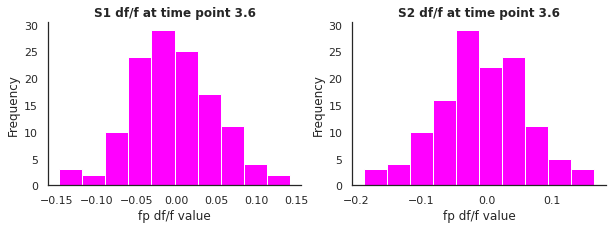

In [66]:
## Inspect data:
df = df_dyn_differences
tp = 3.6
tt = 'fp'
assert tp in np.unique(df['timepoint'])
assert tt in np.unique(df['trial_type'])
assert 'S1' in np.unique(df['region'])
assert 'S2' in np.unique(df['region'])
plt.rcParams['figure.figsize'] = (10, 3)
for i_reg, reg in enumerate(['s1', 's2']):
    plt.subplot(1, 2, 1 + i_reg)
    plt.hist(df[np.logical_and(df['trial_type'] == tt, np.logical_and(np.isclose(df['timepoint'], tp),
                               df['region'] == reg.upper()))]['diff_dff'],
            color=color_tt['fp'])
    plt.xlabel(f'{tt} df/f value'); plt.ylabel('Frequency'); 
    plt.title(f'{reg.upper()} df/f at time point {tp}', weight='bold');
sns.despine()

## Single time point decoder example:

Mouse J064, Starting loop 1/1


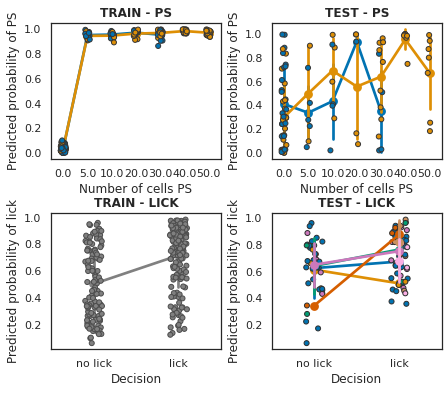

In [106]:
_ = pop.plot_single_session_single_tp_decoding_performance(session=sessions[2])

In [6]:
## Inspect influence autorewards:
# mouse = 'J048'
# print(df_prediction_test[mouse][np.logical_and(df_prediction_test[mouse]['autorewarded_test'] == 1,
#                                                df_prediction_test[mouse]['true_stim_test'] > 0)]['pred_dec_test'].mean())

# print(df_prediction_test[mouse][np.logical_and(df_prediction_test[mouse]['autorewarded_test'] == 0,
#                                                df_prediction_test[mouse]['true_stim_test'] > 0)]['pred_dec_test'].mean())

# print(df_prediction_test[mouse][df_prediction_test[mouse]['true_stim_test'] > 0 ]['pred_dec_test'].mean())

## Check single neurons

In [109]:
# dw = decoder_weights['s1_stim']['J048_R29']
# dw_as = np.argsort(np.sum(dw, 1))[::-1]

# plt.rcParams['figure.figsize'] = (8, 8)
# plt.imshow(dw[dw_as, :], aspect='auto', cmap='PiYG', vmin=-0.5, vmax=0.5)
# plt.colorbar()
# # plt.plot(np.mean(np.abs(dw[dw_as[900:], :]), 0))

# dw_as[300]

In [110]:
# s2_inds = np.where(sessions[2].s1_bool)[0]
# plt.rcParams['figure.figsize'] = (9, 5)
# neuron_data = sessions[2].behaviour_trials[s2_inds[dw_as[6]], :,:][:, sessions[2].filter_ps_array]
# for tt in ['hit', 'miss', 'fp', 'cr']:
#     plt.plot(np.mean(neuron_data[sessions[2].outcome == tt, :], 0), label=tt)
# # for tt in [0, 1]:
# #     plt.plot(np.mean(neuron_data[sessions[2].decision == tt, :], 0), label=tt)

# plt.legend()

## Train dynamic decoders:

In [111]:
tp_dict['decoders'] = tp_dict['mutual']#[np.logical_and(tp_dict['mutual'] >-2]#, tp_dict['mutual'] <= 4)]

In [112]:
## Compute results decoders (note: CV of regularisation is down below in the notebook)
(lick_acc, lick_acc_split, ps_acc, ps_acc_split, lick_half, 
     angle_dec, decoder_weights) = pof.compute_accuracy_time_array_average_per_mouse(sessions=sessions, 
                                               time_array=tp_dict['decoders'],
                                              projected_data=False, 
                                              reg_type='l2', regularizer=50,  #reg_type='none',
                                              average_fun=pof.class_av_mean_accuracy,
                                              split_fourway=True)

480it [11:48,  1.48s/it]


In [114]:
violin_df_test = pof.get_decoder_data_for_violin_plots(sessions=sessions,
                                                       tp_list=[1.0, 4.0])


Number of trials for mouse J063: 107, multiplications: 93.46
Number of trials for mouse J064: 299, multiplications: 33.44
Number of trials for mouse J065: 101, multiplications: 99.01
Number of trials for mouse RL070: 319, multiplications: 31.35
Corrected number of trials for mouse J063: 19902
Corrected number of trials for mouse J064: 19734
Corrected number of trials for mouse J065: 19998
Corrected number of trials for mouse RL070: 19778


## Create PS decoding summary plot

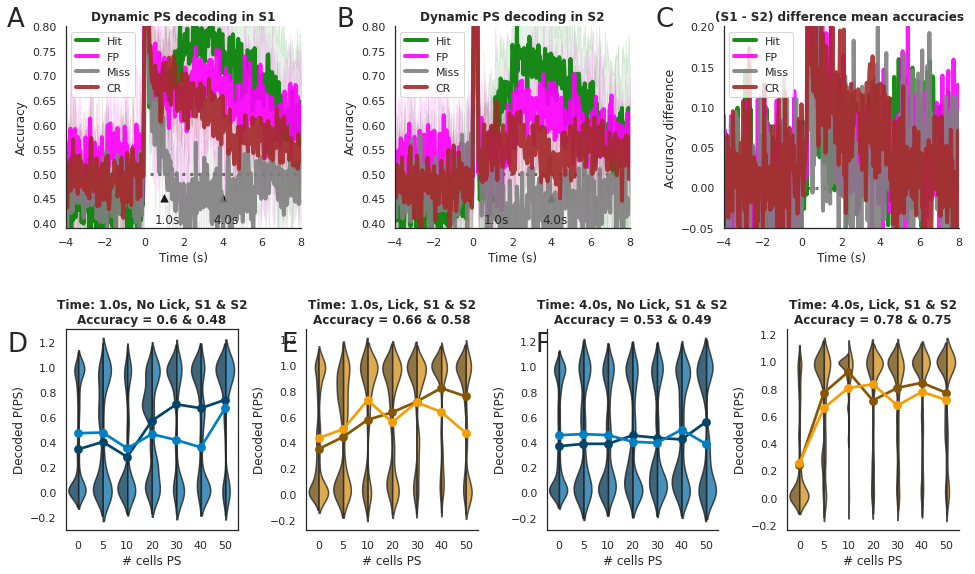

In [124]:
pop.plot_dyn_stim_decoding_compiled_summary_figure(ps_acc_split=ps_acc_split,
                                          violin_df_test=violin_df_test,
                                          time_array=tp_dict['decoders'])

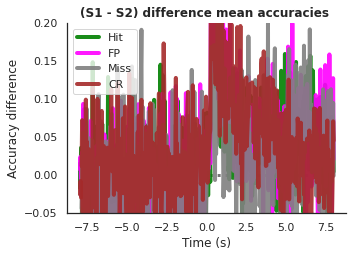

In [128]:
## Same plot as previous figure panel C; to only show difference in case of shuffled labels

## NB: THIS MUST BE DONE BY SHUFFLING THE DATA BEFOREHAND (SEE TOP OF NB)

pop.plot_dynamic_decoding_region_difference_panel(time_array=tp_dict['decoders'],
                                                  ps_acc_split=ps_acc_split
                                                  )
sns.despine()
# plt.savefig('figures/shuffled_s1s2_ps_decoding_difference.pdf', bbox_inches='tight')

## Lick decoding

In [146]:
violin_df_test = pof.get_decoder_data_for_violin_plots(sessions=sessions,
                                                       tp_list=[1.8])


Number of trials for mouse J063: 107, multiplications: 93.46
Number of trials for mouse J064: 299, multiplications: 33.44
Number of trials for mouse J065: 101, multiplications: 99.01
Number of trials for mouse RL070: 319, multiplications: 31.35
Corrected number of trials for mouse J063: 19902
Corrected number of trials for mouse J064: 19734
Corrected number of trials for mouse J065: 19998
Corrected number of trials for mouse RL070: 19778


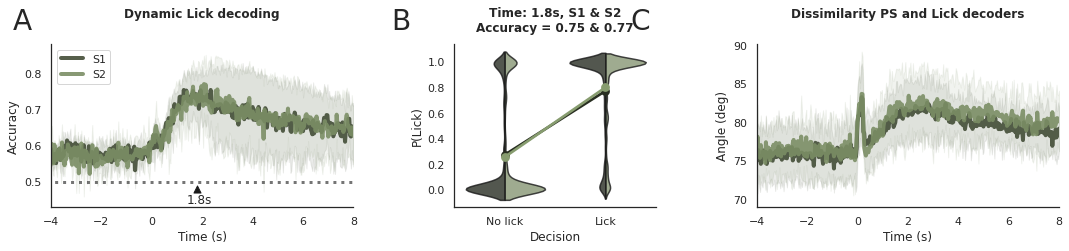

In [147]:
pop.plot_dyn_lick_decoding_compiled_summary_figure(violin_df_test=violin_df_test, 
                                                   time_array=tp_dict['decoders'], 
                                                   lick_acc=lick_acc, angle_dec=angle_dec)

# Supplemental figs

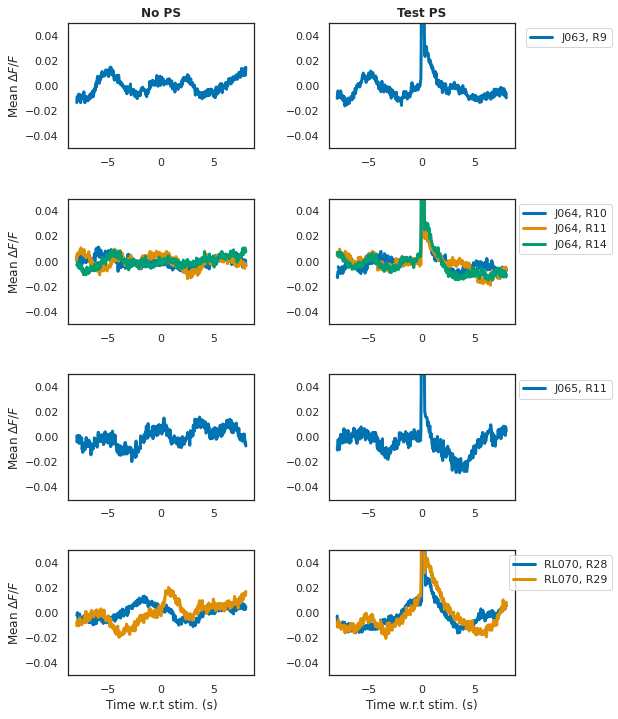

In [150]:
pop.plot_average_ps_traces_per_mouse(sessions=sessions)

## Cross validate regularization value

Idea:
  - It depends on number of neurons. So either scale with n_neurons, but I'm not sure what scaling (e.g. linear) this is.. So instead we'll optimise per session. S1/S2 are about 50/50 so we'll ignore this (also because their perfomance varies)
  - Per session; evaluate 3 seconds post stim at 5Hz. Find the maximum test decoding accuracy (for both decoders). we'll take the corresponding C value.
  - Save in some file because this takes some time to run

In [374]:
(lick_acc, lick_acc_split, ps_acc, ps_acc_split, lick_half, 
                 angle_dec, dec_weights) = pof.compute_accuracy_time_array(sessions={0: sessions[0]}, time_array=tp_dict['cv_reg'],
                                                              projected_data=False, reg_type='none',
                                                              region_list=['s1'],
                                                              average_fun=pof.class_av_mean_accuracy)

11it [00:02,  4.39it/s]


In [377]:
## Integrate different imaging frequencies:
assert 'mutual' in tp_dict.keys()
tp_dict['cv_reg'] = tp_dict['mutual'][np.logical_and(tp_dict['mutual'] <= 3, tp_dict['mutual'] > 0)]  # Use all time points < 3 post stim
c_value_array = np.array([50, 20, 5, 2, 0.5, 0.2, 0.05, 0.02, 0.005, 0.002])  # list of C values, where 1/C is reg strength
    
dict_cv_results = {}
for reg in ['s1', 's2']:
    print(f'---------------\n{reg}\n-------------\n')
    dict_cv_results[reg] = pof.perform_logreg_cv(sessions=sessions, 
                                                 c_value_array=c_value_array, 
                                                 reg_list=[reg])

0it [00:00, ?it/s]

---------------
s1
-------------

Mouse RL070, run 28


11it [00:02,  4.04it/s]
11it [00:03,  3.26it/s]
11it [00:03,  3.39it/s]
11it [00:03,  3.39it/s]
11it [00:03,  3.36it/s]
11it [00:03,  3.49it/s]
11it [00:03,  3.55it/s]
11it [00:03,  3.39it/s]
11it [00:03,  3.63it/s]
11it [00:02,  3.75it/s]
11it [00:02,  3.88it/s]
0it [00:00, ?it/s]

Mouse RL070, run 29


11it [00:02,  4.84it/s]
11it [00:02,  4.16it/s]
11it [00:02,  4.30it/s]
11it [00:02,  4.15it/s]
11it [00:02,  4.38it/s]
11it [00:02,  4.46it/s]
11it [00:02,  4.63it/s]
11it [00:02,  4.96it/s]
11it [00:02,  5.16it/s]
11it [00:02,  5.32it/s]
11it [00:02,  5.50it/s]
1it [00:00,  7.46it/s]

Mouse J048, run 27


11it [00:01,  7.40it/s]
11it [00:01,  5.62it/s]
11it [00:01,  5.66it/s]
11it [00:01,  5.71it/s]
11it [00:01,  5.65it/s]
11it [00:01,  5.79it/s]
11it [00:01,  5.90it/s]
11it [00:01,  6.23it/s]
11it [00:01,  6.49it/s]
11it [00:01,  7.24it/s]
11it [00:01,  7.97it/s]
1it [00:00,  6.91it/s]

Mouse J048, run 28


11it [00:01,  6.85it/s]
11it [00:02,  5.41it/s]
11it [00:02,  5.34it/s]
11it [00:02,  5.34it/s]
11it [00:02,  5.26it/s]
11it [00:02,  5.36it/s]
11it [00:01,  5.56it/s]
11it [00:01,  5.70it/s]
11it [00:01,  6.01it/s]
11it [00:01,  6.88it/s]
11it [00:01,  6.93it/s]
1it [00:00,  5.77it/s]

Mouse J048, run 29


11it [00:01,  5.78it/s]
11it [00:03,  3.54it/s]
11it [00:03,  3.50it/s]
11it [00:03,  3.37it/s]
11it [00:03,  3.38it/s]
11it [00:03,  3.40it/s]
11it [00:03,  3.38it/s]
11it [00:02,  4.34it/s]
11it [00:02,  4.85it/s]
11it [00:02,  5.48it/s]
11it [00:02,  5.46it/s]
1it [00:00,  6.08it/s]

Mouse J048, run 30


11it [00:01,  6.11it/s]
11it [00:02,  4.04it/s]
11it [00:03,  3.17it/s]
11it [00:03,  3.15it/s]
11it [00:03,  3.18it/s]
11it [00:02,  3.70it/s]
11it [00:02,  4.42it/s]
11it [00:02,  4.75it/s]
11it [00:02,  5.01it/s]
11it [00:01,  5.92it/s]
11it [00:01,  6.32it/s]
1it [00:00,  5.73it/s]

Mouse J048, run 32


11it [00:01,  5.75it/s]
11it [00:02,  3.83it/s]
11it [00:02,  3.76it/s]
11it [00:03,  3.22it/s]
11it [00:02,  3.80it/s]
11it [00:03,  3.51it/s]
11it [00:02,  3.69it/s]
11it [00:02,  4.03it/s]
11it [00:02,  4.12it/s]
11it [00:02,  5.02it/s]
11it [00:02,  5.34it/s]
1it [00:00,  7.34it/s]

Mouse J064, run 10


11it [00:01,  7.68it/s]
11it [00:01,  5.66it/s]
11it [00:01,  5.79it/s]
11it [00:01,  5.78it/s]
11it [00:01,  5.77it/s]
11it [00:01,  6.12it/s]
11it [00:01,  6.43it/s]
11it [00:01,  7.30it/s]
11it [00:01,  7.79it/s]
11it [00:01,  8.39it/s]
11it [00:01,  8.47it/s]
1it [00:00,  6.12it/s]

Mouse J064, run 11


11it [00:01,  6.21it/s]
11it [00:02,  4.98it/s]
11it [00:02,  4.99it/s]
11it [00:02,  4.69it/s]
11it [00:02,  4.60it/s]
11it [00:02,  5.17it/s]
11it [00:02,  5.30it/s]
11it [00:01,  5.69it/s]
11it [00:01,  5.98it/s]
11it [00:01,  6.45it/s]
11it [00:01,  6.55it/s]
0it [00:00, ?it/s]

Mouse J064, run 14


11it [00:02,  5.01it/s]
11it [00:02,  4.16it/s]
11it [00:02,  4.14it/s]
11it [00:02,  4.12it/s]
11it [00:02,  4.14it/s]
11it [00:02,  4.21it/s]
11it [00:02,  4.34it/s]
11it [00:02,  4.65it/s]
11it [00:02,  4.82it/s]
11it [00:02,  5.10it/s]
11it [00:02,  5.22it/s]
2it [00:00, 11.18it/s]

Mouse J063, run 8


11it [00:00, 12.64it/s]
11it [00:01,  9.13it/s]
11it [00:01,  8.98it/s]
11it [00:01,  9.56it/s]
11it [00:01, 10.06it/s]
11it [00:00, 11.12it/s]
11it [00:00, 12.45it/s]
11it [00:00, 14.04it/s]
11it [00:00, 14.84it/s]
11it [00:00, 14.97it/s]
11it [00:00, 15.04it/s]
1it [00:00,  6.19it/s]

Mouse J063, run 9


11it [00:01,  6.41it/s]
11it [00:02,  5.30it/s]
11it [00:02,  5.27it/s]
11it [00:02,  5.29it/s]
11it [00:02,  5.32it/s]
11it [00:02,  5.34it/s]
11it [00:01,  5.59it/s]
11it [00:01,  6.03it/s]
11it [00:01,  6.48it/s]
11it [00:01,  6.94it/s]
11it [00:01,  6.91it/s]
1it [00:00,  5.25it/s]

Mouse RL048, run 23


11it [00:02,  5.43it/s]
11it [00:02,  3.91it/s]
11it [00:03,  3.59it/s]
11it [00:02,  3.92it/s]
11it [00:02,  4.04it/s]
11it [00:02,  3.88it/s]
11it [00:02,  4.18it/s]
11it [00:02,  4.23it/s]
11it [00:02,  4.67it/s]
11it [00:02,  4.86it/s]
11it [00:02,  4.95it/s]
1it [00:00,  5.81it/s]

Mouse RL048, run 24


11it [00:02,  5.14it/s]
11it [00:02,  4.04it/s]
11it [00:02,  4.34it/s]
11it [00:02,  4.45it/s]
11it [00:02,  4.43it/s]
11it [00:02,  4.50it/s]
11it [00:02,  4.70it/s]
11it [00:02,  4.44it/s]
11it [00:02,  5.16it/s]
11it [00:02,  5.48it/s]
11it [00:01,  5.83it/s]
0it [00:00, ?it/s]

Mouse RL048, run 25


11it [00:03,  3.63it/s]
11it [00:04,  2.57it/s]
11it [00:03,  2.76it/s]
11it [00:04,  2.65it/s]
11it [00:03,  2.91it/s]
11it [00:03,  2.88it/s]
11it [00:03,  2.89it/s]
11it [00:03,  3.15it/s]
11it [00:03,  2.83it/s]
11it [00:03,  2.88it/s]
11it [00:03,  3.03it/s]
0it [00:00, ?it/s]

Mouse RL048, run 28


11it [00:03,  3.25it/s]
11it [00:04,  2.27it/s]
11it [00:04,  2.36it/s]
11it [00:04,  2.50it/s]
11it [00:04,  2.48it/s]
11it [00:03,  2.82it/s]
11it [00:04,  2.71it/s]
11it [00:03,  3.33it/s]
11it [00:03,  3.34it/s]
11it [00:03,  3.61it/s]
11it [00:02,  3.89it/s]
0it [00:00, ?it/s]

Mouse RL048, run 29


11it [00:02,  4.93it/s]
11it [00:02,  3.69it/s]
11it [00:03,  3.57it/s]
11it [00:03,  3.36it/s]
11it [00:03,  3.51it/s]
11it [00:02,  3.89it/s]
11it [00:02,  4.04it/s]
11it [00:02,  3.81it/s]
11it [00:02,  4.71it/s]
11it [00:02,  4.60it/s]
11it [00:01,  5.56it/s]
1it [00:00,  8.24it/s]

Mouse J065, run 10


11it [00:01,  9.28it/s]
11it [00:02,  5.47it/s]
11it [00:01,  5.73it/s]
11it [00:01,  6.28it/s]
11it [00:01,  7.09it/s]
11it [00:01,  8.88it/s]
11it [00:01, 10.52it/s]
11it [00:00, 11.72it/s]
11it [00:00, 12.42it/s]
11it [00:00, 12.80it/s]
11it [00:00, 12.79it/s]
1it [00:00,  7.82it/s]

Mouse J065, run 11


11it [00:01,  7.75it/s]
11it [00:01,  6.07it/s]
11it [00:01,  6.03it/s]
11it [00:01,  6.01it/s]
11it [00:01,  5.92it/s]
11it [00:01,  6.31it/s]
11it [00:01,  6.63it/s]
11it [00:01,  7.28it/s]
11it [00:01,  7.75it/s]
11it [00:01,  8.07it/s]
11it [00:01,  8.37it/s]
0it [00:00, ?it/s]

---------------
s2
-------------

Mouse RL070, run 28


11it [00:02,  4.61it/s]
11it [00:03,  3.47it/s]
11it [00:03,  3.17it/s]
11it [00:03,  3.21it/s]
11it [00:03,  3.00it/s]
11it [00:03,  3.58it/s]
11it [00:02,  3.67it/s]
11it [00:02,  4.13it/s]
11it [00:02,  4.35it/s]
11it [00:02,  4.72it/s]
11it [00:02,  4.84it/s]
1it [00:00,  5.23it/s]

Mouse RL070, run 29


11it [00:02,  5.35it/s]
11it [00:02,  4.56it/s]
11it [00:02,  4.66it/s]
11it [00:02,  4.66it/s]
11it [00:02,  4.75it/s]
11it [00:02,  4.94it/s]
11it [00:02,  5.14it/s]
11it [00:01,  5.50it/s]
11it [00:01,  5.72it/s]
11it [00:01,  6.08it/s]
11it [00:01,  6.08it/s]
1it [00:00,  6.99it/s]

Mouse J048, run 27


11it [00:01,  7.05it/s]
11it [00:02,  5.32it/s]
11it [00:02,  5.26it/s]
11it [00:02,  5.24it/s]
11it [00:02,  5.21it/s]
11it [00:02,  5.40it/s]
11it [00:01,  5.56it/s]
11it [00:01,  5.92it/s]
11it [00:01,  6.36it/s]
11it [00:01,  7.17it/s]
11it [00:01,  7.41it/s]
1it [00:00,  6.72it/s]

Mouse J048, run 28


11it [00:01,  6.65it/s]
11it [00:02,  5.20it/s]
11it [00:02,  5.15it/s]
11it [00:02,  5.11it/s]
11it [00:02,  5.05it/s]
11it [00:02,  5.15it/s]
11it [00:02,  5.36it/s]
11it [00:01,  5.63it/s]
11it [00:01,  5.99it/s]
11it [00:01,  6.58it/s]
11it [00:01,  6.81it/s]
1it [00:00,  5.76it/s]

Mouse J048, run 29


11it [00:02,  5.48it/s]
11it [00:03,  3.55it/s]
11it [00:03,  3.41it/s]
11it [00:03,  3.46it/s]
11it [00:03,  3.56it/s]
11it [00:03,  3.16it/s]
11it [00:03,  3.07it/s]
11it [00:03,  3.61it/s]
11it [00:02,  4.04it/s]
11it [00:02,  4.38it/s]
11it [00:02,  5.12it/s]
0it [00:00, ?it/s]

Mouse J048, run 30


11it [00:02,  4.44it/s]
11it [00:02,  3.82it/s]
11it [00:03,  3.52it/s]
11it [00:02,  3.78it/s]
11it [00:03,  3.23it/s]
11it [00:03,  3.29it/s]
11it [00:03,  3.37it/s]
11it [00:02,  4.43it/s]
11it [00:02,  4.46it/s]
11it [00:02,  4.87it/s]
11it [00:02,  5.09it/s]
1it [00:00,  5.56it/s]

Mouse J048, run 32


11it [00:02,  5.14it/s]
11it [00:02,  3.80it/s]
11it [00:02,  3.95it/s]
11it [00:03,  3.61it/s]
11it [00:02,  3.84it/s]
11it [00:02,  3.70it/s]
11it [00:02,  4.18it/s]
11it [00:02,  4.32it/s]
11it [00:02,  5.07it/s]
11it [00:01,  5.67it/s]
11it [00:02,  4.95it/s]
1it [00:00,  6.34it/s]

Mouse J064, run 10


11it [00:01,  7.76it/s]
11it [00:01,  5.92it/s]
11it [00:01,  5.66it/s]
11it [00:01,  5.95it/s]
11it [00:01,  6.09it/s]
11it [00:01,  6.49it/s]
11it [00:01,  6.87it/s]
11it [00:01,  7.68it/s]
11it [00:01,  8.15it/s]
11it [00:01,  8.55it/s]
11it [00:01,  8.57it/s]
1it [00:00,  6.42it/s]

Mouse J064, run 11


11it [00:01,  6.67it/s]
11it [00:02,  5.32it/s]
11it [00:02,  5.27it/s]
11it [00:02,  5.31it/s]
11it [00:02,  5.40it/s]
11it [00:01,  5.57it/s]
11it [00:01,  5.83it/s]
11it [00:01,  6.28it/s]
11it [00:01,  6.64it/s]
11it [00:01,  7.13it/s]
11it [00:01,  7.21it/s]
1it [00:00,  5.23it/s]

Mouse J064, run 14


11it [00:02,  5.17it/s]
11it [00:02,  4.20it/s]
11it [00:02,  4.20it/s]
11it [00:02,  4.26it/s]
11it [00:02,  4.29it/s]
11it [00:02,  4.38it/s]
11it [00:02,  4.51it/s]
11it [00:02,  5.01it/s]
11it [00:02,  5.25it/s]
11it [00:01,  5.63it/s]
11it [00:01,  5.57it/s]
2it [00:00, 11.12it/s]

Mouse J063, run 8


11it [00:00, 11.74it/s]
11it [00:01,  9.12it/s]
11it [00:01,  8.91it/s]
11it [00:01,  9.70it/s]
11it [00:01, 10.13it/s]
11it [00:00, 11.36it/s]
11it [00:00, 12.46it/s]
11it [00:00, 13.98it/s]
11it [00:00, 14.50it/s]
11it [00:00, 14.77it/s]
11it [00:00, 14.88it/s]
1it [00:00,  5.37it/s]

Mouse J063, run 9


11it [00:02,  5.33it/s]
11it [00:02,  4.34it/s]
11it [00:02,  4.31it/s]
11it [00:02,  4.35it/s]
11it [00:02,  4.42it/s]
11it [00:02,  4.54it/s]
11it [00:02,  4.71it/s]
11it [00:02,  5.14it/s]
11it [00:02,  5.36it/s]
11it [00:01,  5.78it/s]
11it [00:01,  5.85it/s]
0it [00:00, ?it/s]

Mouse RL048, run 23


11it [00:02,  4.95it/s]
11it [00:02,  3.91it/s]
11it [00:02,  3.98it/s]
11it [00:02,  4.16it/s]
11it [00:02,  4.15it/s]
11it [00:02,  4.31it/s]
11it [00:02,  4.09it/s]
11it [00:02,  4.73it/s]
11it [00:02,  4.83it/s]
11it [00:02,  5.37it/s]
11it [00:02,  5.42it/s]
1it [00:00,  6.14it/s]

Mouse RL048, run 24


11it [00:01,  5.70it/s]
11it [00:02,  4.41it/s]
11it [00:02,  4.64it/s]
11it [00:02,  4.58it/s]
11it [00:02,  4.14it/s]
11it [00:02,  3.68it/s]
11it [00:02,  3.74it/s]
11it [00:02,  3.97it/s]
11it [00:02,  5.28it/s]
11it [00:01,  5.59it/s]
11it [00:02,  4.91it/s]
0it [00:00, ?it/s]

Mouse RL048, run 25


11it [00:03,  3.02it/s]
11it [00:04,  2.65it/s]
11it [00:04,  2.60it/s]
11it [00:04,  2.70it/s]
11it [00:03,  2.88it/s]
11it [00:03,  2.84it/s]
11it [00:03,  3.00it/s]
11it [00:03,  3.20it/s]
11it [00:03,  3.44it/s]
11it [00:03,  3.28it/s]
11it [00:03,  3.48it/s]
0it [00:00, ?it/s]

Mouse RL048, run 28


11it [00:02,  3.95it/s]
11it [00:03,  2.81it/s]
11it [00:03,  3.08it/s]
11it [00:03,  3.08it/s]
11it [00:03,  3.05it/s]
11it [00:03,  2.99it/s]
11it [00:03,  3.14it/s]
11it [00:03,  3.03it/s]
11it [00:02,  3.76it/s]
11it [00:02,  3.89it/s]
11it [00:03,  3.54it/s]
0it [00:00, ?it/s]

Mouse RL048, run 29


11it [00:02,  4.94it/s]
11it [00:02,  3.92it/s]
11it [00:02,  3.98it/s]
11it [00:02,  4.04it/s]
11it [00:02,  4.10it/s]
11it [00:02,  4.02it/s]
11it [00:02,  4.37it/s]
11it [00:02,  4.75it/s]
11it [00:02,  4.93it/s]
11it [00:02,  4.60it/s]
11it [00:02,  4.74it/s]
1it [00:00,  7.36it/s]

Mouse J065, run 10


11it [00:01,  9.75it/s]
11it [00:02,  5.16it/s]
11it [00:01,  5.53it/s]
11it [00:01,  6.80it/s]
11it [00:01,  8.22it/s]
11it [00:01, 10.31it/s]
11it [00:00, 11.58it/s]
11it [00:00, 13.10it/s]
11it [00:00, 13.53it/s]
11it [00:00, 13.76it/s]
11it [00:00, 14.40it/s]
1it [00:00,  8.32it/s]

Mouse J065, run 11


11it [00:01,  8.24it/s]
11it [00:01,  6.42it/s]
11it [00:01,  6.43it/s]
11it [00:01,  6.53it/s]
11it [00:01,  6.59it/s]
11it [00:01,  6.92it/s]
11it [00:01,  7.44it/s]
11it [00:01,  8.25it/s]
11it [00:01,  8.57it/s]
11it [00:01,  9.09it/s]
11it [00:01,  9.27it/s]


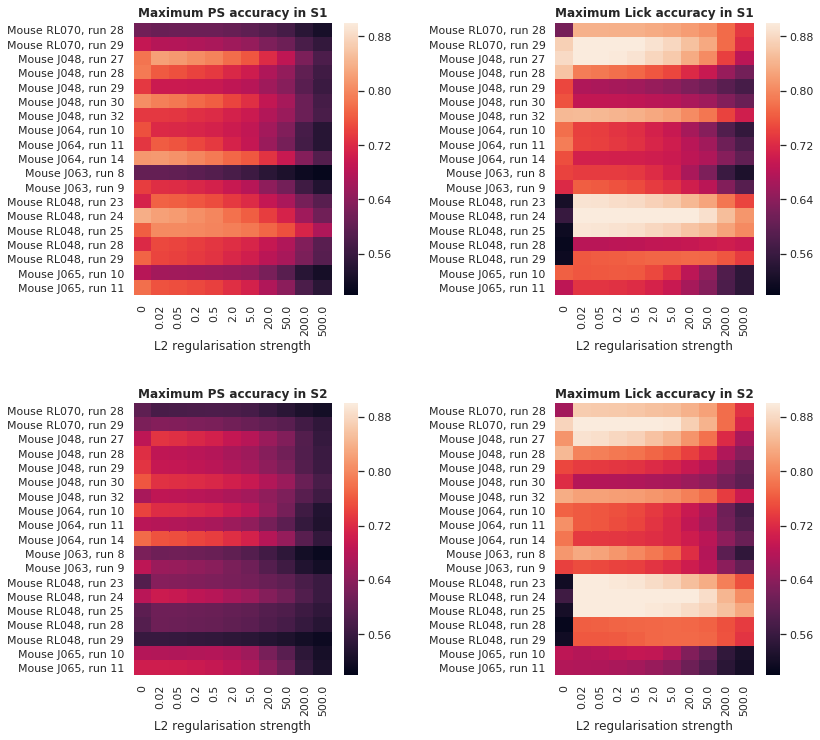

In [388]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.subplots_adjust(wspace=0.7, hspace=0.4)

for i_reg, reg in enumerate(['s1', 's2']):
    max_acc_scores = dict_cv_results[reg]
    n_sessions = len(max_acc_scores)
    n_cvalues = max_acc_scores[0].shape[0]
    dict_max_acc_all = {xx: np.zeros((n_sessions, n_cvalues)) for xx in ['PS', 'Lick']}
    for key, acc in max_acc_scores.items():
        dict_max_acc_all['Lick'][key, :] = acc[:, 0]
        dict_max_acc_all['PS'][key, :] = acc[:, 1]

    c_labels = [0] + [1/c for c in c_value_array]
    ss_labels = [str(ss) for key, ss in sessions.items()]

    for i_plot, xx in enumerate(['PS', 'Lick']):
        plt.subplot(2, 2, i_plot + 1 + (i_reg * 2))
        ax1 = sns.heatmap(dict_max_acc_all[xx], xticklabels=c_labels, yticklabels=ss_labels, vmin=0.5, vmax=0.9)
    #     plt.xlabel('1/C value of L2 regularisation'); plt.title(f'Maximum {xx} test accuracy during 3 seconds post-stim')
        plt.xlabel('L2 regularisation strength'); plt.title(f'Maximum {xx} accuracy in {reg.upper()}', weight='bold')

        bottom, top = ax1.get_ylim()
        ax1.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('figures/optimise_regularisation.pdf', bbox_inches='tight')

In [152]:
df_details = pof.create_df_table_details(sessions=sessions)
df_details
# df_details.to_latex(index=False)  # print latex Tabular code

Mouse J065, run 11 165 165
Mouse J063, run 9 170 170
Mouse J064, run 10 132 132
Mouse J064, run 11 140 140
Mouse J064, run 14 179 179
Mouse RL070, run 28 315 315
Mouse RL070, run 29 197 197


,Mouse,Run,f (Hz),$N$S1,$N$S2,Trials,Hit,FP,Miss,CR,UR Hit,AR Miss,Too early
0,J063,9,30,329,275,109,17,18,28,39,0,2,5
1,J064,10,30,295,129,95,25,23,13,25,2,1,8
2,J064,11,30,481,190,88,16,13,17,27,0,2,13
3,J064,14,30,537,203,122,30,24,20,30,0,3,15
4,J065,11,30,161,111,104,25,36,7,18,1,3,15
5,RL070,28,30,296,196,215,16,1,74,105,2,19,0
6,RL070,29,30,363,224,129,28,12,25,53,2,6,5


In [159]:
print('Total number of imaged cells is', df_details[r"$N$" + 'S2'].sum() + df_details[r"$N$" + 'S1'].sum())

Total number of imaged cells is 3790


In [160]:
# np.sum(sessions[14].unrewarded_hits)
print('FIRST LICK TIMES FOR UR HITS FOR ALL SESSIONS\n')
for i_ss, sess in sessions.items():
    print(sess, '\n')
#     print('ratio UR hit / AR miss',
#           np.sum(np.logical_and(sess.autorewarded, sess.unrewarded_hits)) / np.sum(sess.autorewarded))
    for ii, triall in enumerate(sess.nonnan_trials):
        if sess.unrewarded_hits[ii]:
            print('UH', sess.run.spiral_licks[triall][0])
    #     elif sessions[14].outcome[ii] == 'hit':
    #         print('H', sess.run.spiral_licks[triall][0])
    print('-------------------------------\n')

FIRST LICK TIMES FOR UR HITS FOR ALL SESSIONS

Mouse J065, run 11 



AttributeError: 'SessionLite' object has no attribute 'run'

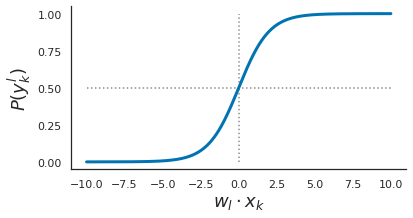

In [54]:
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 20
tmp = plt.subplot(111)
x_array = np.linspace(-10, 10, 601)
y_array = 1 / (1 + np.exp(-1 * x_array))
tmp.plot([0, 0], [0, 1], color='k', alpha=0.5, linestyle=':')
tmp.plot([-10, 10], [0.5, 0.5], color='k', alpha=0.5, linestyle=':')
tmp.plot(x_array, y_array, linewidth=3)
tmp.set_xlabel(r"$w_l \cdot x_k$", fontdict={'fontsize': 18})
tmp.set_ylabel(r"$P(y_k^l)$", fontdict={'fontsize': 18})
tmp.set_yticks(np.array([0, 0.25, 0.5, 0.75, 1]))
sns.despine()